# matplotlib를 활용한 데이터 시각화
## 왕좌의 게임 데이터으로 실습

In [1]:
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
battles = pd.read_csv('data/data-society-game-of-thrones/battles.csv')
death = pd.read_csv('data/data-society-game-of-thrones/character-deaths.csv')

### 실습 1. 책의 챕터별로 사망자 수의 추이를 그려보자!

In [3]:
death.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [4]:
d = death['Book of Death'].value_counts().sort_index()

<IPython.core.display.Javascript object>


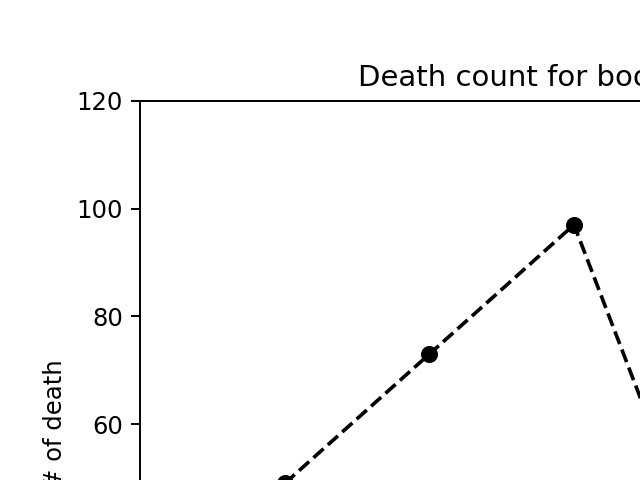

In [5]:
graph1 = d.plot(color = 'k', linestyle = '--', marker = 'o')

In [6]:
graph1.set_xlim([0, 6])

(0, 6)

In [7]:
graph1.set_ylim([0, 120])

(0, 120)

In [8]:
graph1.set_xlabel("book chapter")

Text(0.5,41.6639,'book chapter')

In [9]:
graph1.set_ylabel("# of death")

Text(66.7639,0.5,'# of death')

In [10]:
graph1.set_title("Death count for book chapter")

Text(0.5,1,'Death count for book chapter')

In [11]:
graph1.figure.savefig('test.jpg')

### 실습 2. 대규모 전쟁의  공격진영과 수비 진영의 숫자를 그래프로 그려보자!
#### 대규모 전쟁 = 공격과 수비 모두 합쳐서 10,000명 이상 참가한 전쟁

In [12]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [14]:
battles = battles.set_index('name')

In [17]:
#공격과 수비 합쳐서 10,000명 이상 참가한 전쟁만 선택하여 big_battles에 할당
big_battles = battles[battles['attacker_size'] + battles['defender_size']>=10000]

In [19]:
#big_battles에서 attcker_size와 defender_size만 선택
big_battles = big_battles[['attacker_size', 'defender_size']]

<IPython.core.display.Javascript object>


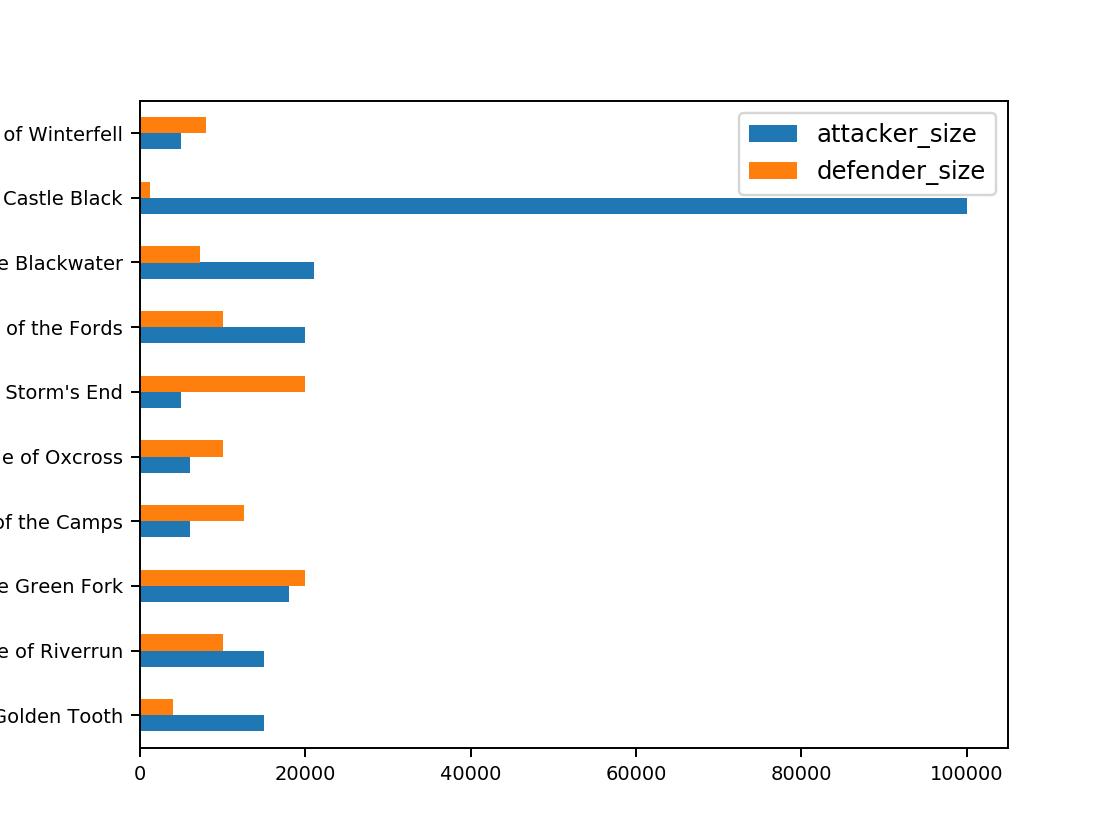

In [24]:
big_battles.plot(kind = 'barh', stacked = False, fontsize = 8)
#stacked = True -> 하나의 막대로 표현
#stacked = False -> 여러 개의 막대로 표현

### 실습 3. 가문 별로 전쟁을 벌인 횟수를 그래프로 그려보자!

In [25]:
battles.head()

,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [26]:
#전투에 참여한 가문 정보를 가진 컬럼명들을 추출
col_names = battles.columns[4:12]
col_names

Index(['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4'],
      dtype='object')

In [29]:
#아래 셀에 있는 np_unique()는 NaN값이 있는 경우, 에러가 발생하므로, fillna() 으로  NaN값 처리
house_names = battles[col_names].fillna('None')

In [34]:
# 한 번이라도 전쟁에 참여한 가문의 목록
house_names = np.unique(house_names)

In [35]:
# 'None' 제거
house_names = house_names[house_names != 'None']

array(['Baratheon', 'Blackwood', 'Bolton', 'Bracken', 'Brave Companions',
       'Brotherhood without Banners', 'Darry', 'Free folk', 'Frey',
       'Giants', 'Glover', 'Greyjoy', 'Karstark', 'Lannister', 'Mallister',
       'Mormont', "Night's Watch", 'Stark', 'Thenns', 'Tully', 'Tyrell'], dtype=object)

In [36]:
type(house_names)

numpy.ndarray

In [39]:
battles.head(2)

,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN


In [38]:
#house_names를 인덱스 라벨로 하고, 값은 모두 0으로 할당된 Series를 생성
house_to_battle_count = pd.Series(0, index = house_names)
house_to_battle_count

Baratheon                      0
Blackwood                      0
Bolton                         0
Bracken                        0
Brave Companions               0
Brotherhood without Banners    0
Darry                          0
Free folk                      0
Frey                           0
Giants                         0
Glover                         0
Greyjoy                        0
Karstark                       0
Lannister                      0
Mallister                      0
Mormont                        0
Night's Watch                  0
None                           0
Stark                          0
Thenns                         0
Tully                          0
Tyrell                         0
dtype: int64

In [43]:
#attacker_1  컬럼과 defender_1 컬럼만 있다고 가정했을 시, 가문별 전투 횟수
battles['attacker_1'].value_counts().add(battles['defender_1'].value_counts(), fill_value = 0)

Baratheon                      10.0
Blackwood                       1.0
Bolton                          3.0
Bracken                         1.0
Brave Companions                3.0
Brotherhood without Banners     1.0
Darry                           2.0
Free folk                       1.0
Frey                            2.0
Greyjoy                        10.0
Lannister                      17.0
Mallister                       1.0
Night's Watch                   1.0
Stark                          16.0
Tully                           4.0
Tyrell                          2.0
dtype: float64

In [44]:
for col in col_names:
    house_to_battle_count = house_to_battle_count.add(battles[col].value_counts(), fill_value = 0)

In [45]:
house_to_battle_count

Baratheon                      11.0
Blackwood                       1.0
Bolton                          4.0
Bracken                         1.0
Brave Companions                3.0
Brotherhood without Banners     1.0
Darry                           2.0
Free folk                       1.0
Frey                            4.0
Giants                          1.0
Glover                          2.0
Greyjoy                        11.0
Karstark                        2.0
Lannister                      18.0
Mallister                       1.0
Mormont                         2.0
Night's Watch                   1.0
None                            0.0
Stark                          16.0
Thenns                          1.0
Tully                           7.0
Tyrell                          2.0
dtype: float64

<IPython.core.display.Javascript object>


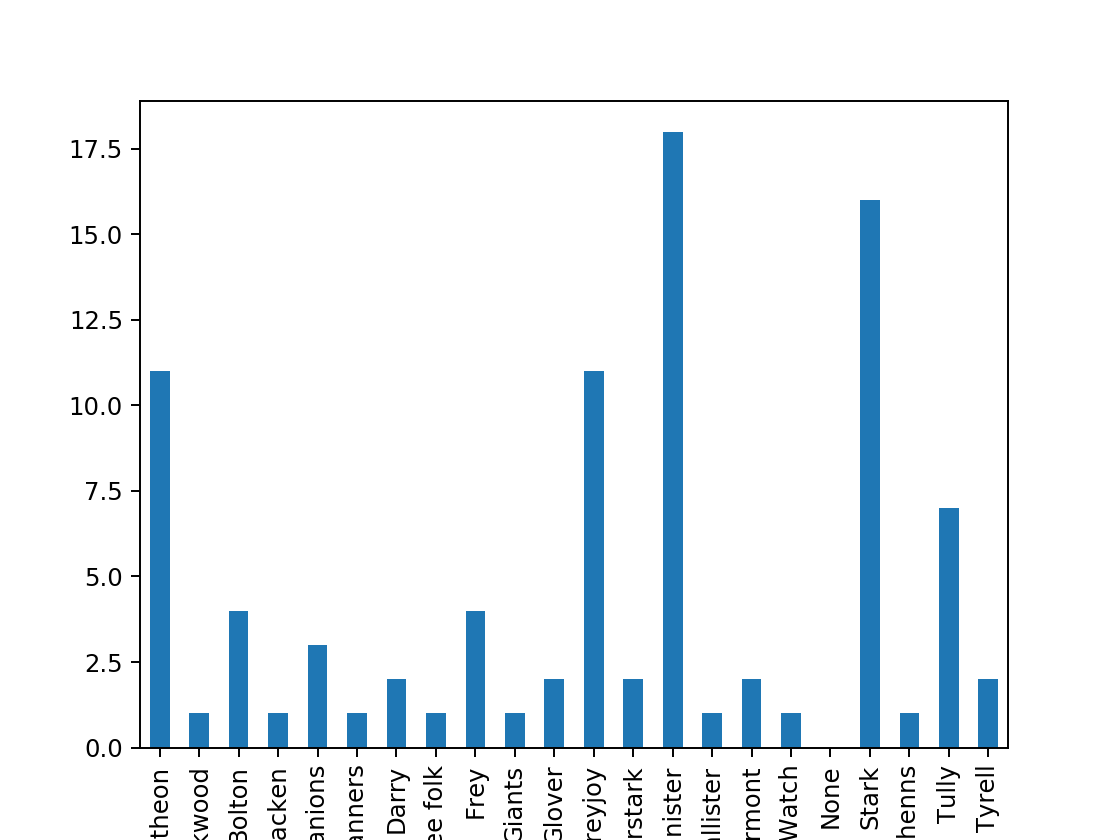

In [46]:
house_to_battle_count.plot(kind = 'bar')

### 실습 4. 년도별로 사망자의 숫자와 전쟁이 벌어진 횟수를 함께 그려보자!

In [52]:
battle_count_to_year = battles.groupby('year')['battle_number'].agg('count')
battle_count_to_year

year
298     7
299    20
300    11
Name: battle_number, dtype: int64

In [56]:
death_count_to_year = death.groupby('Death Year')['Death Year'].agg('count')
death_count_to_year

Death Year
297.0      3
298.0     46
299.0    156
300.0    100
Name: Death Year, dtype: int64

In [59]:
death_battle_corr = pd.concat([battle_count_to_year, death_count_to_year], axis = 1)

In [61]:
death_battle_corr.columns = ['# of battles', '# of death']
death_battle_corr

,# of battles,# of death
297.0,NaN,3
298.0,7.0,46
299.0,20.0,156
300.0,11.0,100


<IPython.core.display.Javascript object>


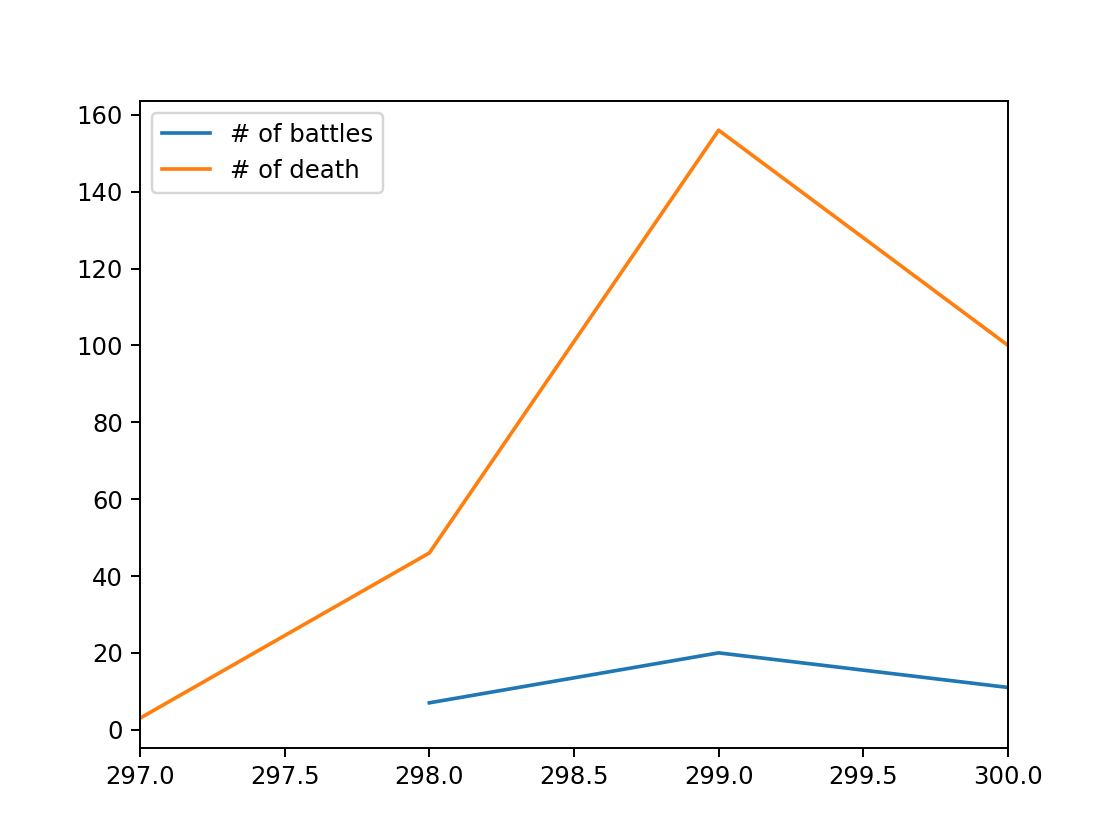

In [62]:
death_battle_corr.plot()

In [63]:
death_battle_corr.corr(method = 'pearson')

,# of battles,# of death
# of battles,1.000000,0.978443
# of death,0.978443,1.000000


# matplotlib 기반 최신 시각화 라이브러리 소개
1. seaborn
  - matplotlib을 기반으로 만들어진 시각화 라이브러리
  - 디자인적으로 훨씬 세련됨.  
  - matplotlib와 사용방식이 유사하므로 쉽고 빠르게 습득할 수 있음.
  - https://seaborn.pydata.org/

2. bokeh
  - 웹브라우저 상에서의 시각화에 효과적인 파이썬 인터랙티브 시각화 라이브러리
  - 플롯을 html 파일로 export하여 이를 웹브라우저를 통해 확인할 수 있음.
  - matplotlib와 비슷, jupyter와 호환이 잘 됨. 
  - https://bokeh.pydata.org/en/latest/

3. Folium 
  - 지리적 데이터 시각화에 특화된 라이브러리 (leaflet.js 기반)
  - 웹브라우저에서 확인 가능
  - 지도 데이터 사용을 위해 선행되어야 하는 작업이 원래 매우 많은데, 이러한 선행작업을 간단화함.
  - https://github.com/python-visualization/folium
  - http://python-visualization.github.io/folium/docs-v0.5.0/
  - http://pinkwink.kr/971

# 서울시 유동인구 데이터 분석

In [64]:
유동인구 = pd.read_excel('data/project data/기본 데이터/유동인구통계_2015.xlsx')
유동인구.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015
1,2,30-001,지하철,금,08시-09시,112.5,2015
2,3,30-001,지하철,금,09시-10시,108.0,2015
3,4,30-001,지하철,금,10시-11시,94.5,2015
4,5,30-001,지하철,금,11시-12시,87.0,2015


In [66]:
유동인구설문 = pd.read_excel('data/project data/기본 데이터/유동인구상세로그_2015.xlsx')
유동인구설문.head(3)

,ID속성조사,조사지점코드,조사일자,조사요일,남여구분,조사시간대,조사시간대_텍스트,연령대,거주지,통행주목적,방문횟수,동행자명,교통수단,보행환경,직업명,년도
0,ID_ATRB_EXAMIN,EXAMIN_SPOT_CD,EXAMIN_DAY,EXAMIN_DATE,MW_MN_SE,EXAMIN_TMZON,EXAMIN_TMZON_TEXT,AGRDE_CN,HOME_AREA,VISIT_PURPS,VISIT_FQ,CNCDNT_MAN_NM,TRNSPORT_MN,WALK_ENVRN,OCCP_NM,YEAR
1,1,01-003,1016,금,여자,NaN,오전11시~오후2시,50-54세,종로구,업무관련,주1~2회,NaN,NaN,약간만족,전문/자유직,2015
2,2,01-003,1016,금,남자,NaN,오전11시~오후2시,60-64세,성북구,업무관련,주3~5회,NaN,NaN,매우만족,일용/작업직,2015


In [68]:
측정위치 = pd.read_excel('data/project data/기본 데이터/유동인구측정위치정보_2015.xlsx')
측정위치.head()

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사


In [70]:
#folium 라이브러리 설치
# anaconda prompt에서 'pip install folium' 실행
import folium

In [74]:
map1 = folium.Map(location = [37.566535, 126.97796919999996], zoom_start = 15)
map1
# 서울시청을 지도의 중심으로, 지도를 그려줌. 
# zoom_start는 지도를 그릴 때 얼마나 zoom 해서 보여줄 지를 결정.  값이 클수록, zoom in

In [75]:
folium.Marker([37, 126], popup = '테스트지점').add_to(map1)

In [76]:
map1

In [77]:
측정위치.head()

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사


In [82]:
측정위치50 = 측정위치[['조사지점명', 'X좌표', 'Y좌표']].iloc[:50]
측정위치50
# 50개의 측정 위치에 대해 필요한 정보만 저장

,조사지점명,X좌표,Y좌표
0,신흥모피명품전문크리닝.,196423.97707,455511.52968
1,GS25,196315.80243,455621.38262
2,세검정정류장,196357.17125,455680.82580
3,안성타워內 굿모닝파워공인중개사.,197904.19277,456718.34996
4,복실 손뜨기.,196360.44943,456405.89296
5,24시 동대문 설렁탕.,200966.43423,452483.73642
6,서울전문학교.,201686.66781,452747.41594
7,서울 종묘농약,200231.75517,452355.91115
8,서울 종묘농약,200231.75517,452355.91115
9,삼성카드빌딩,199935.57893,452934.78947


In [85]:
# 위치 정보 변환을 위한 라이브러리 설치
# pip install pyproj
#conda install pyproj
from pyproj import Proj, transform

In [86]:
# X좌표, Y좌표를 위도와 경도로 변환하는 함수 선언
def convert(x,y):
    inProj = Proj(init = 'epsg:5181')
    outProj = Proj(init = 'epsg:4326')
    x2,y2 = transform(inProj, outProj, x, y)
    return [y2, x2]

In [88]:
#측정위치50에 위도와 경도 정보를 추가
측정위치50['위경도'] = 측정위치50.apply(lambda 지점: convert(지점['X좌표'], 지점['Y좌표']), axis = 1)
측정위치50.head(3)

,조사지점명,X좌표,Y좌표,위경도
0,신흥모피명품전문크리닝.,196423.97707,455511.52968,"[37.5991696223151, 126.95950527754184]"
1,GS25,196315.80243,455621.38262,"[37.60015896037769, 126.95827976042075]"
2,세검정정류장,196357.17125,455680.82580,"[37.60069470246659, 126.95874792945385]"


In [89]:
#측정위치 50개를 지도에 표시
for row in 측정위치50.iterrows():
    folium.Marker(row[1]['위경도'], popup = row[1]['조사지점명']).add_to(map1)

In [90]:
map1